In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [53]:
df_ice_cream = pd.read_csv('ice_cream.csv')

In [54]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [55]:
df_ice_cream.rename(columns={'DATE':'date','IPN31152N':'production'}, inplace =True)

In [56]:
df_ice_cream.info()
df_ice_cream

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        577 non-null    object 
 1   production  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [57]:
df_ice_cream['date']= pd.to_datetime(df_ice_cream.date)

In [58]:
df_ice_cream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        577 non-null    datetime64[ns]
 1   production  577 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [59]:
df_ice_cream.set_index('date',inplace = True)
df_ice_cream.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [60]:
start_date = pd.to_datetime("2010-01-01")
df_ice_cream = df_ice_cream[start_date:]
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


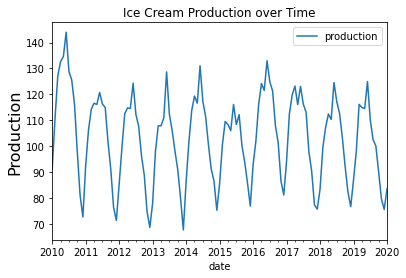

In [68]:
df_ice_cream.plot()
plt.ylabel("Production",fontsize=16)
plt.title('Ice Cream Production over Time')
plt.show()

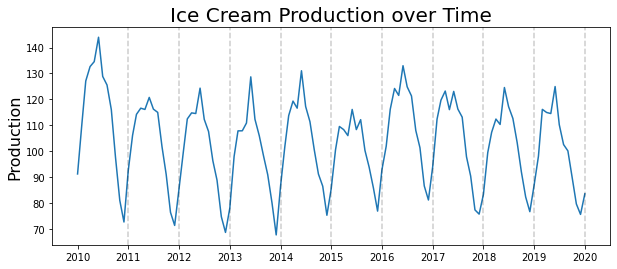

In [67]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

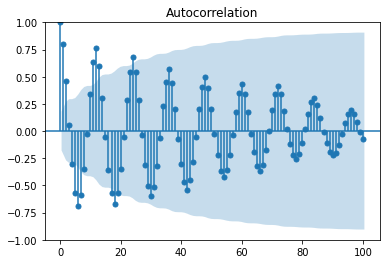

In [69]:
acf_plot = plot_acf(df_ice_cream.production,lags = 100)

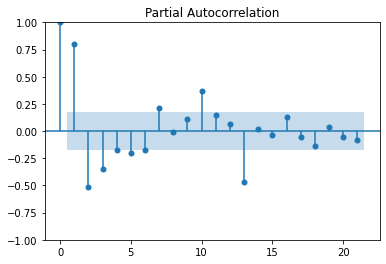

In [71]:
pacf_plot = plot_pacf(df_ice_cream.production, method='ywm')

In [73]:
!python -m pip install yfinance
import yfinance as yf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=325151a763d0a0883af147bdecee9cd21c8b23d62e2bd6b122304beee8ad04b5
  Stored in directory: c:\users\nafissaad\appdata\local\pip\cache\wheels\34\ba\79\c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [74]:
tickerSymbol = 'SPY'

In [76]:
tickerData = yf.Ticker(tickerSymbol)
tickerData

yfinance.Ticker object <SPY>

In [77]:
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [78]:
tickerDf = tickerDf[['Close']]

In [79]:
tickerDf.head()

,Close
Date,
2014-12-31,181.073120
2015-01-02,180.976227
2015-01-05,177.707870
2015-01-06,176.034027
2015-01-07,178.227631


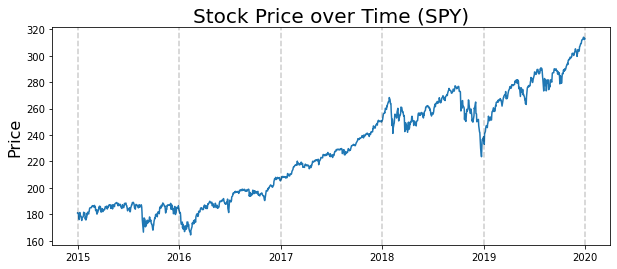

In [80]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [81]:
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [82]:
tickerDf['FirstDifference'] = first_diffs

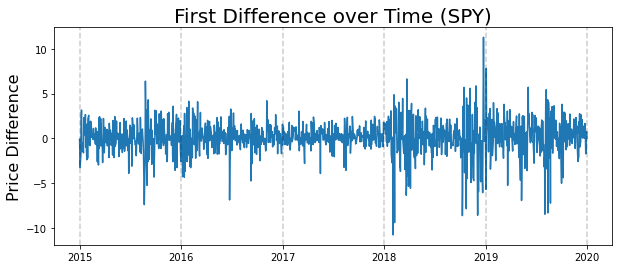

In [83]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

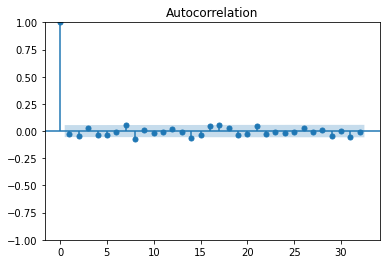

In [84]:
acf_plot = plot_acf(tickerDf.FirstDifference)

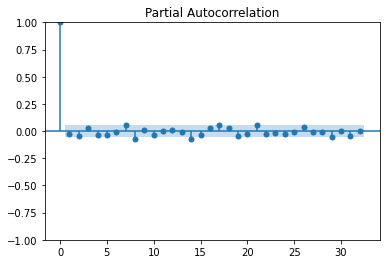

In [86]:
pacf_plot = plot_pacf(tickerDf.FirstDifference,method='ywm')